In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


In [ ]:
# Getting a dataset
train_data = datasets.FashionMNIST(root="data",train=True, download=True, transform=ToTensor(), target_transform=None)
test_data = datasets.FashionMNIST(root="data", train=False,download=True, transform=ToTensor(), target_transform=None)

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.15MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 171kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.17MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.9MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
print(f"Train data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")

Train data size: 60000
Test data size: 10000


In [ ]:
image, label = train_data[0]
print(image)

print(label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
print(f"Image shape {image.shape} should be (color chanel, height, width), label: {class_names[label]}")

Image shape torch.Size([1, 28, 28]) should be (color chanel, height, width), label: Ankle boot


Text(0.5, 1.0, 'Ankle boot: (9)')

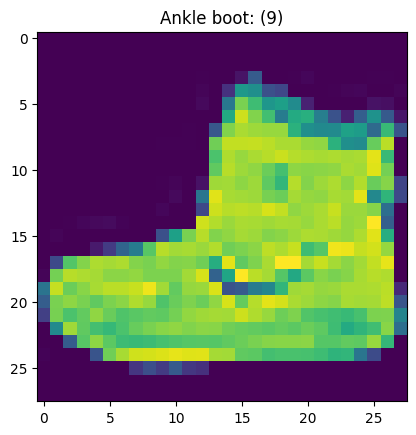

In [ ]:
plt.imshow(image.squeeze())
plt.title(label=f"{class_names[label]}: ({label})")

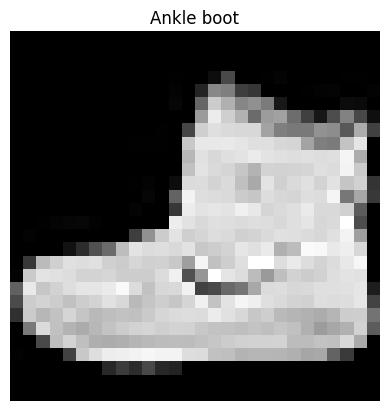

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False);

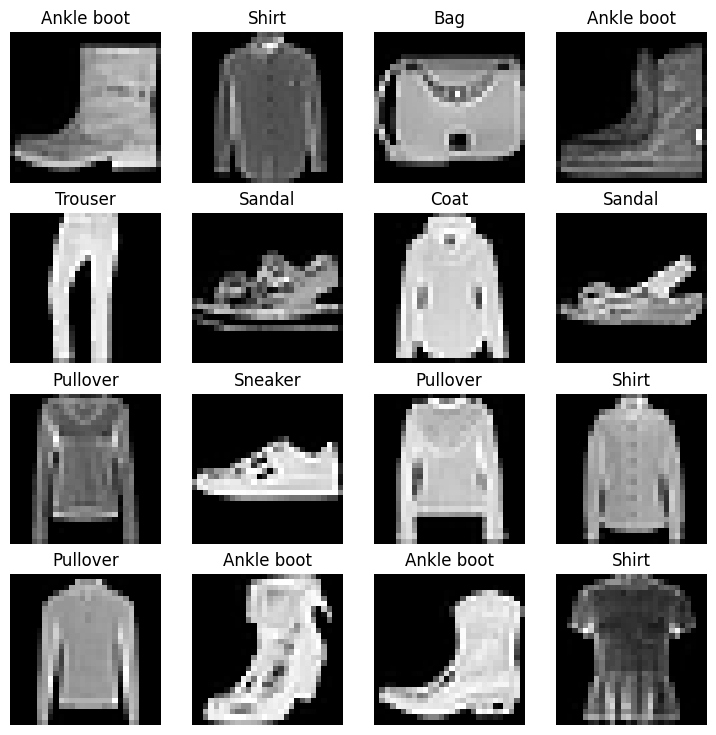

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
print(train_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7eb371e76b50>,
 <torch.utils.data.dataloader.DataLoader at 0x7eb372126c50>)

In [ ]:
print(len(train_dataloader))

1875


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size torch.Size([1, 28, 28])


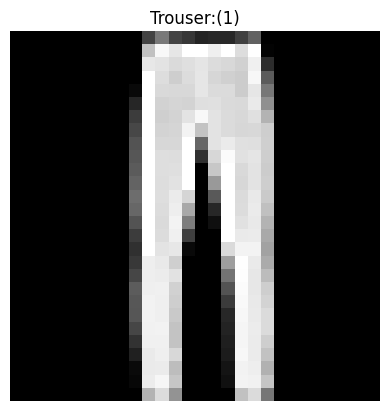

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(1,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray",)
plt.title(label=f"{class_names[label]}:({label})")
plt.axis(False)
print(f"image size {img.shape}")

In [ ]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
x.shape
output = flatten_model(x)
print(output.shape)

torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
model_0 = FashionMNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(class_names)).to("cpu")
model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.4283,  0.1136, -0.3903, -0.0246, -0.0698,  0.2508,  0.4007, -0.4172,
         -0.0264, -0.2463]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069])),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.

In [ ]:
import requests
from pathlib import Path

In [ ]:
if(Path("helper_functions.py").is_file()):
    print("helper_functions.py already exist skipping download.")
    from helper_function import accuracy_fn
else:
    print("download")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(request.content)
    from helper_function import accuracy_fn

download


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

train time on cpu: 0.000 seconds


4.444199998943077e-05

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}")
  train_loss = 0
  for batch , (x,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(x)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"looked at {batch*len(x)}/{len(train_dataloader.dataset)} samples.")
  train_loss /= len(train_dataloader)
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      test_pred = model_0(x_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"train loss{train_loss:.4f}, test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
train loss0.5948, test loss: 0.5164, test acc: 81.8391
epoch: 1
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
train loss0.4795, test loss: 0.4814, test acc: 83.1769
epoch: 2
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
train loss0.4570, test loss: 0.4777, test acc: 83.4964
train time on cpu: 23.278 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn,
               device = "cuda" if torch.cuda.is_available() else "cpu"
               ):
  """Returns a dictonary containing the results of the model when it predicts on the data_loader."""
  loss, acc = 0,0
  model.to(device=device)

  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x = x.to(device=device)
      y = y.to(device=device)
      y_pred = model(x)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {'model_name' : model.__class__.__name__, "model_loss":loss.item(),"model_acc":acc}
model_0_results=eval_model(model=model_0,data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4777320921421051,
 'model_acc': 83.49640575079871}

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int,output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x : torch.Tensor):
    return self.layer_stack(x)

In [ ]:
print(next(model_0.parameters()).device)

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
print(next(model_1.parameters()).device)

cuda:0
cuda:0


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.train()
  for batch , (x,y) in enumerate(data_loader):
    x,y = x.to(device), y.to(device)

    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss:{train_loss:.5f}, train accurarcy: {train_acc:.2f}%")

In [ ]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device : torch.device = "cuda" if torch.cuda.is_available() else "cpu"
              ):
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for x, y in data_loader:
      x, y = x.to(device), y.to(device)
      test_pred = model(x)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"test loss: {test_loss:.5f}, test accuracy {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)
train_time_start_on_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n")
  train_step(model=model_1,data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device = device)
  test_step(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device= next(model_1.parameters()).device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0

Train loss:1.09199, train accurarcy: 61.34%
test loss: 0.95636, test accuracy 65.00%

epoch: 1

Train loss:0.78101, train accurarcy: 71.93%
test loss: 0.72227, test accuracy 73.91%

epoch: 2

Train loss:0.67027, train accurarcy: 75.94%
test loss: 0.68500, test accuracy 75.02%

train time on cuda:0: 27.534 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4777320921421051,
 'model_acc': 83.49640575079871}

In [ ]:
total_train_time_model_0

23.277783081999985

In [ ]:
model_1_results = eval_model(model=model_1,data_loader=test_dataloader, loss_fn=loss_fn,accuracy_fn=accuracy_fn)
print(model_1_results)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 75.01996805111821}


In [ ]:
class FashionMNISTModelV2(nn.Module):
  """Replicates TinyVGG from CNN explainer website.
  """
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.convo_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
  )
    self.convo_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units, out_channels= hidden_units, kernel_size=3, stride = 1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
  )

    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
                                  )
  def forward(self, x):
    x = self.convo_block_1(x)
    #print(f"conv block 1 output shape: {x.shape}")
    x = self.convo_block_2(x)
    #print(f"Conv block 2 output shape: {x.shape}")
    x = self.classifier(x)
    #print(f"classifier output shape: {x.shape}")
    return x


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device=device)

In [ ]:
torch.manual_seed(42)
images = torch.randn(size=(32, 3, 64, 64))
test_image= images[0]
print(f"Image Batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image Batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [ ]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
conv_output = conv_layer(test_image.unsqueeze(0))
print(conv_output.shape)
print(test_image.shape)

torch.Size([1, 10, 62, 62])
torch.Size([3, 64, 64])


In [ ]:
print(f"original test image shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv_layer = conv_layer(test_image.unsqueeze(dim=0))
print(f"test image through conv shape: {test_image_through_conv_layer.shape}")
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv_layer)
print(f"Shape after going through both conv and max pool layer {test_image_through_conv_and_max_pool.shape}")

original test image shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
test image through conv shape: torch.Size([1, 10, 62, 62])
Shape after going through both conv and max pool layer torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))
print(random_tensor,"\n")
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(max_pool_tensor)
print(max_pool_tensor.shape)

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) 

tensor([[[[0.3367]]]])
torch.Size([1, 1, 1, 1])


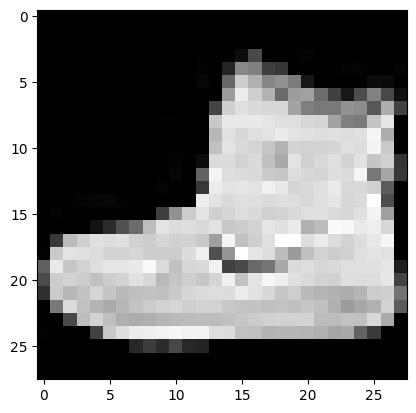

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28),device=device)
print(f"Rand image shape: {rand_image_tensor.shape}")

Rand image shape: torch.Size([1, 28, 28])


In [ ]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0314, -0.0745,  0.0847, -0.0518,  0.0127,  0.0252,  0.0188, -0.0039,
         -0.0169, -0.0039]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_model_2 = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"\nepoch {epoch}---------------")
  train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn,optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
  test_step(model=model_2,data_loader=test_dataloader, loss_fn=loss_fn,accuracy_fn=accuracy_fn, device=device)
train_time_end_model_2 = timer()
total_train_time_model_2= print_train_time(start=train_time_start_model_2, end=train_time_end_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]


epoch 0---------------
Train loss:0.59459, train accurarcy: 78.42%
test loss: 0.38346, test accuracy 86.49%


epoch 1---------------
Train loss:0.35709, train accurarcy: 87.19%
test loss: 0.35282, test accuracy 87.11%


epoch 2---------------
Train loss:0.32193, train accurarcy: 88.38%
test loss: 0.31270, test accuracy 88.68%

train time on cuda: 33.186 seconds


In [ ]:
model_2_results = eval_model(model_2,test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)
print(model_2_results)

print(f"model 0 results: {model_0_results}")
print(f"model 1 results: {model_1_results}")
print(f"model 2 results: {model_2_results}")

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.3126983046531677, 'model_acc': 88.67811501597444}
model 0 results: {'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4777320921421051, 'model_acc': 83.49640575079871}
model 1 results: {'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 75.01996805111821}
model 2 results: {'model_name': 'FashionMNISTModelV2', 'model_loss': 0.3126983046531677, 'model_acc': 88.67811501597444}


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477732,83.496406
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.312698,88.678115


In [ ]:
compare_results["training_time"]=[total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.477732,83.496406,23.277783
1,FashionMNISTModelV1,0.685001,75.019968,27.534450
2,FashionMNISTModelV2,0.312698,88.678115,33.185632


Text(0, 0.5, 'model')

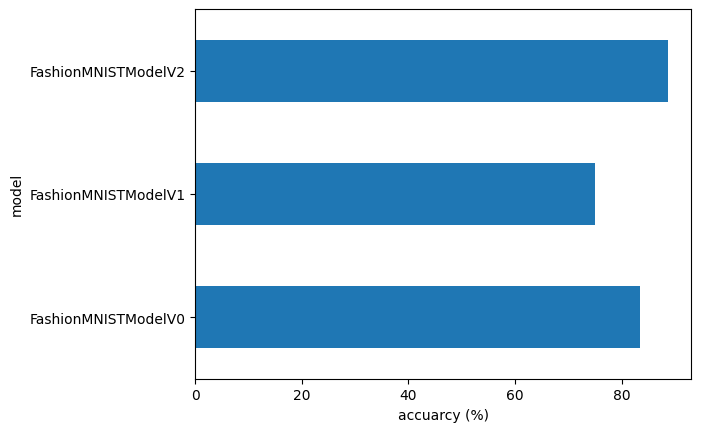

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuarcy (%)")
plt.ylabel("model")

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device = "cuda" if torch.cuda.is_available() else "cpu"):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device=device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [ ]:
img, label = test_data[0][:10]
print(img.shape, label)

torch.Size([1, 28, 28]) 9


In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
print(test_samples[0].shape)

torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Bag')

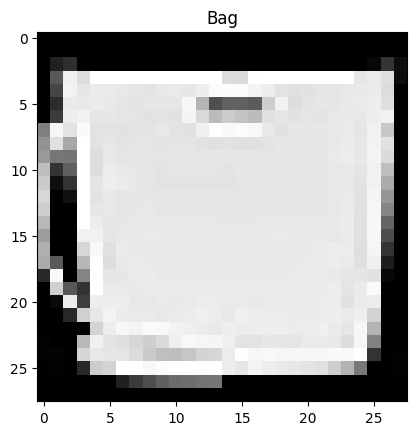

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs=make_predictions(model=model_2, data=test_samples )
print(pred_probs[:2])
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)

tensor([[8.0425e-04, 6.7265e-06, 7.8977e-05, 2.8891e-06, 2.3924e-04, 5.4020e-05,
         2.4732e-03, 9.1916e-06, 9.9621e-01, 1.1875e-04],
        [4.5445e-08, 1.3068e-07, 2.4925e-07, 2.5572e-07, 1.1958e-08, 9.9978e-01,
         3.9923e-08, 3.6746e-08, 2.0733e-04, 8.0848e-06]])
tensor([8, 5, 5, 0, 6, 8, 2, 7, 5])


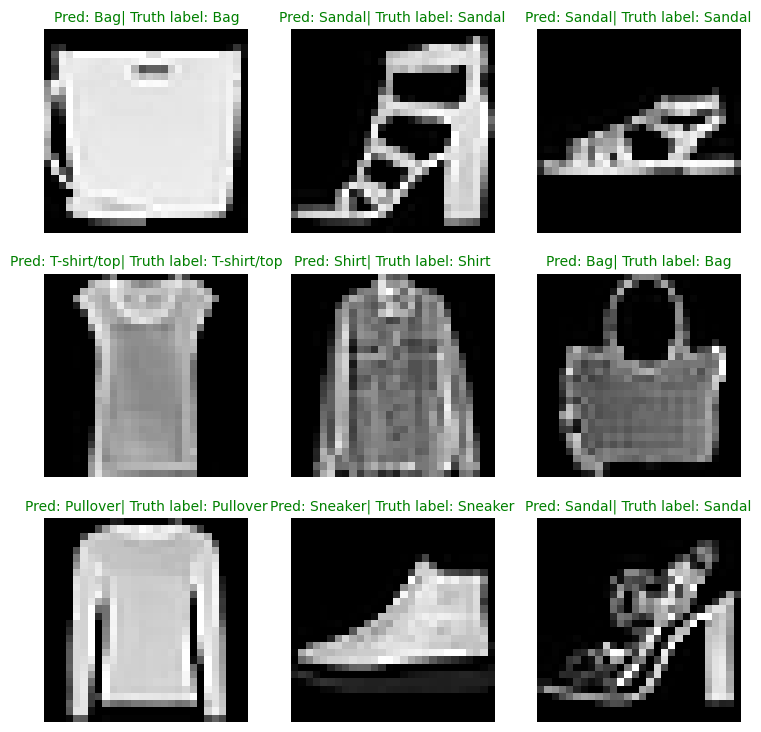

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows,ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label}| Truth label: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

In [ ]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for x, y in tqdm(test_dataloader, desc="Making predictions..."):
    x,y = x.to(device), y.to(device)
    y_logits = model_2(x)
    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
print(y_pred_tensor[:10])

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


In [ ]:
import mlxtend
int(mlxtend.__version__.split(".")[1]) >= 19

True

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.6/931.6 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.4 MB/s eta 0:00:00
mlxtend version 0.23.4


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
#confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = ConfusionMatrix(task="multiclass",num_classes=len(class_names))(preds=y_pred_tensor, target=test_data.targets)
#confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

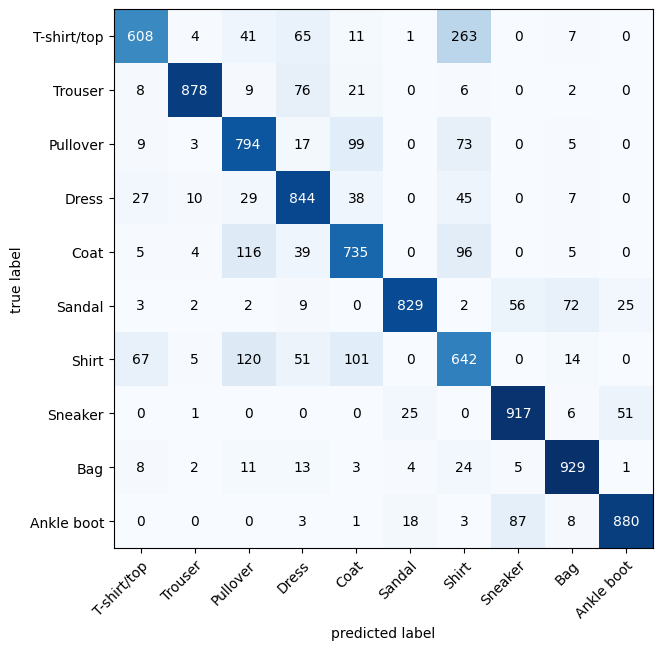

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=class_names,figsize=(10,7))

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "03_pytorch_computer_vision_model_02.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving Model to {MODEL_SAVE_PATH}")
torch.save(obj= model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving Model to models/03_pytorch_computer_vision_model_02.pth


In [ ]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10,output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device=device)

<ipython-input-66-518809b4fae8>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (convo_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convo_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(model=loaded_model_2,data_loader=test_dataloader,loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
print(model_2_results)
print(loaded_model_2_results)

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.3126983046531677, 'model_acc': 88.67811501597444}
{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.3126983046531677, 'model_acc': 88.67811501597444}


In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
               torch.tensor(loaded_model_2_results["model_loss"]),atol=1e-2)

tensor(True)